<a href="https://colab.research.google.com/github/en-ashay/Airquality-predction/blob/main/ML_Project_Airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://raw.githubusercontent.com/twairball/gams-dataset/master/gams_indoor.csv" -O gams.csv

--2023-03-06 18:11:25--  https://raw.githubusercontent.com/twairball/gams-dataset/master/gams_indoor.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7201257 (6.9M) [text/plain]
Saving to: ‘gams.csv’

gams.csv            100%[===================>]   6.87M  --.-KB/s    in 0.1s    

2023-03-06 18:11:26 (68.9 MB/s) - ‘gams.csv’ saved [7201257/7201257]



In [ ]:
import pandas as pd
df = pd.read_csv('gams.csv')
df.columns

Index(['ts', 'co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc'], dtype='object')

In [ ]:
# !pip install -U pandas-profiling
import pandas as pd
# from ydata_profiling import ProfileReport
df=pd.read_csv("gams.csv")
df['ts']=pd.to_datetime(df['ts'], format="%Y-%m-%d %H:%M:%S")
# profile = ProfileReport(df, title="Profiling Report")
df.head()

ts    co2  humidity  pm10  pm25  temperature    voc
0 2016-11-21 00:47:03  708.0     72.09  10.2   9.0        20.83  0.062
1 2016-11-21 00:48:03  694.0     70.95  10.9  10.1        21.01  0.062
2 2016-11-21 00:49:03  693.0     69.12  10.2   9.9        21.20  0.062
3 2016-11-21 00:50:03  692.0     68.83   9.6   9.6        21.37  0.062
4 2016-11-21 00:51:03  690.0     68.60   9.4   8.4        21.49  0.062

# EDA

In [ ]:
profile.to_notebook_iframe()
profile.to_file("mendeley.html")

In [ ]:
df.dtypes

ts             datetime64[ns]
co2                   float64
humidity              float64
pm10                  float64
pm25                  float64
temperature           float64
voc                   float64
dtype: object

In [ ]:
df.nunique()

ts             135099
co2              1907
humidity         3190
pm10              800
pm25              740
temperature       987
voc               709
dtype: int64

##Time series plot

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Create a list of columns to use as y
y_cols = [col for col in df.columns if col != 'ts']

# Create the dropdown menu to select the y column
updatemenus = [dict(type='dropdown',
                    buttons=[dict(label=col,
                                  method='update',
                                  args=[{'y': [df[col]]}]) for col in y_cols],
                    direction='down',
                    showactive=True,
                    x=0.05,
                    xanchor='left',
                    y=1.25,
                    yanchor='top')]

# Create a line plot with plotly
fig = go.Figure(data=go.Scatter(x=df['ts'], y=df[y_cols[0]], mode='lines'),
                layout=go.Layout(updatemenus=updatemenus))
pio.write_html(fig, 'plot.html')
# Show the plot
fig.show()


# Models

## LSTM 

AUTOREGRESSIVE (Daywise)

Epoch 1/50
81/81 - 5s - loss: 0.1551 - 5s/epoch - 57ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0717 - 227ms/epoch - 3ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0464 - 224ms/epoch - 3ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0421 - 178ms/epoch - 2ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0407 - 176ms/epoch - 2ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0403 - 196ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0391 - 182ms/epoch - 2ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0387 - 222ms/epoch - 3ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0379 - 198ms/epoch - 2ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0374 - 173ms/epoch - 2ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0371 - 214ms/epoch - 3ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0361 - 189ms/epoch - 2ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0365 - 209ms/epoch - 3ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0355 - 185ms/epoch - 2ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0352 - 190ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0354 - 189ms/epoch - 2ms/step
Epo

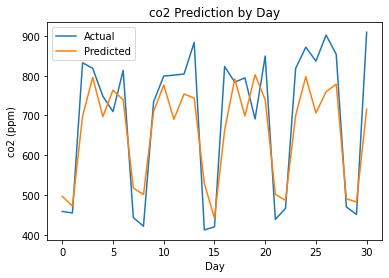

Epoch 1/50
81/81 - 3s - loss: 0.1207 - 3s/epoch - 39ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0401 - 178ms/epoch - 2ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0262 - 195ms/epoch - 2ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0248 - 171ms/epoch - 2ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0244 - 172ms/epoch - 2ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0236 - 184ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0228 - 212ms/epoch - 3ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0226 - 184ms/epoch - 2ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0222 - 192ms/epoch - 2ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0217 - 185ms/epoch - 2ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0207 - 183ms/epoch - 2ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0201 - 223ms/epoch - 3ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0198 - 216ms/epoch - 3ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0192 - 181ms/epoch - 2ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0191 - 191ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0183 - 173ms/epoch - 2ms/step
Epo

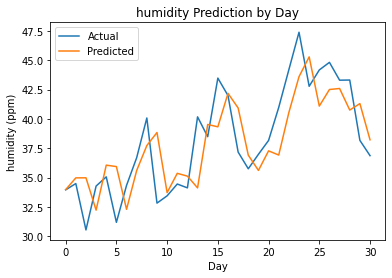

Epoch 1/50
81/81 - 3s - loss: 0.0855 - 3s/epoch - 37ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0469 - 192ms/epoch - 2ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0403 - 178ms/epoch - 2ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0389 - 164ms/epoch - 2ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0380 - 186ms/epoch - 2ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0376 - 183ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0365 - 179ms/epoch - 2ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0361 - 195ms/epoch - 2ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0354 - 176ms/epoch - 2ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0351 - 177ms/epoch - 2ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0341 - 172ms/epoch - 2ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0338 - 182ms/epoch - 2ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0334 - 194ms/epoch - 2ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0328 - 182ms/epoch - 2ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0326 - 182ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0324 - 177ms/epoch - 2ms/step
Epo

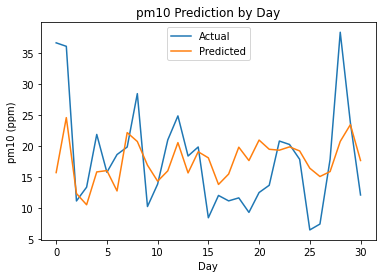

Epoch 1/50
81/81 - 3s - loss: 0.0699 - 3s/epoch - 32ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0500 - 200ms/epoch - 2ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0447 - 194ms/epoch - 2ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0437 - 195ms/epoch - 2ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0428 - 227ms/epoch - 3ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0424 - 180ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0420 - 187ms/epoch - 2ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0416 - 199ms/epoch - 2ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0412 - 199ms/epoch - 2ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0407 - 183ms/epoch - 2ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0405 - 200ms/epoch - 2ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0403 - 190ms/epoch - 2ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0396 - 191ms/epoch - 2ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0398 - 165ms/epoch - 2ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0392 - 188ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0389 - 164ms/epoch - 2ms/step
Epo

1/1 [==============================] - 1s 973ms/step
Test RMSE: 7.90


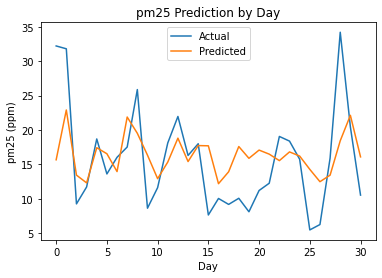

Epoch 1/50
81/81 - 3s - loss: 0.2230 - 3s/epoch - 33ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0761 - 217ms/epoch - 3ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0506 - 201ms/epoch - 2ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0488 - 225ms/epoch - 3ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0476 - 173ms/epoch - 2ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0471 - 201ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0458 - 175ms/epoch - 2ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0455 - 226ms/epoch - 3ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0449 - 232ms/epoch - 3ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0440 - 234ms/epoch - 3ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0429 - 266ms/epoch - 3ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0417 - 256ms/epoch - 3ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0415 - 213ms/epoch - 3ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0411 - 208ms/epoch - 3ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0398 - 190ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0396 - 166ms/epoch - 2ms/step
Epo

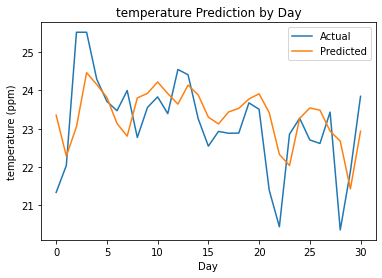

Epoch 1/50
81/81 - 3s - loss: 0.0685 - 3s/epoch - 36ms/step
Epoch 2/50
81/81 - 0s - loss: 0.0379 - 174ms/epoch - 2ms/step
Epoch 3/50
81/81 - 0s - loss: 0.0332 - 184ms/epoch - 2ms/step
Epoch 4/50
81/81 - 0s - loss: 0.0325 - 176ms/epoch - 2ms/step
Epoch 5/50
81/81 - 0s - loss: 0.0323 - 182ms/epoch - 2ms/step
Epoch 6/50
81/81 - 0s - loss: 0.0322 - 199ms/epoch - 2ms/step
Epoch 7/50
81/81 - 0s - loss: 0.0322 - 220ms/epoch - 3ms/step
Epoch 8/50
81/81 - 0s - loss: 0.0317 - 174ms/epoch - 2ms/step
Epoch 9/50
81/81 - 0s - loss: 0.0313 - 179ms/epoch - 2ms/step
Epoch 10/50
81/81 - 0s - loss: 0.0310 - 199ms/epoch - 2ms/step
Epoch 11/50
81/81 - 0s - loss: 0.0309 - 170ms/epoch - 2ms/step
Epoch 12/50
81/81 - 0s - loss: 0.0308 - 229ms/epoch - 3ms/step
Epoch 13/50
81/81 - 0s - loss: 0.0304 - 261ms/epoch - 3ms/step
Epoch 14/50
81/81 - 0s - loss: 0.0305 - 177ms/epoch - 2ms/step
Epoch 15/50
81/81 - 0s - loss: 0.0301 - 183ms/epoch - 2ms/step
Epoch 16/50
81/81 - 0s - loss: 0.0300 - 167ms/epoch - 2ms/step
Epo

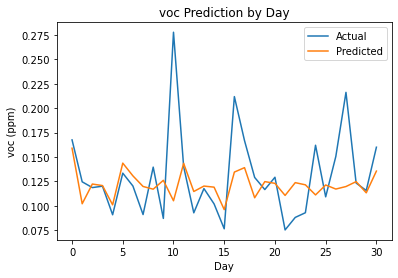

{'co2': 219.0556661722628,
 'humidity': 5.585562875085156,
 'pm10': 8.810864949194107,
 'pm25': 7.901932797341588,
 'temperature': 1.3916812458496408,
 'voc': 0.046346902230651646}

In [ ]:
from statsmodels.tsa.base import prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

pollutants=['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc'] ## All pollutants

  # load data
df = pd.read_csv('gams.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)


def predictions(df,feature):
  # resample data by day and calculate daily mean
  df_daily = df.resample('D').mean()
  df_daily.dropna(inplace=True)

  # normalize data
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(df_daily[[f'{feature}']])

  # split into training and testing sets
  train_size = int(len(data) * 0.8)
  test_size = len(data) - train_size
  train, test = data[0:train_size,:], data[train_size:len(data),:]

  # function to create dataset with look_back number of previous time steps
  def create_dataset(dataset, look_back=1):
      X, Y = [], []
      for i in range(len(dataset)-look_back-1):
          X.append(dataset[i:(i+look_back), 0])
          Y.append(dataset[i + look_back, 0])
      return np.array(X), np.array(Y)

  # reshape into X=t and Y=t+1
  look_back = 7
  train_X, train_Y = create_dataset(train, look_back)
  test_X, test_Y = create_dataset(test, look_back)

  # reshape input to be [samples, time steps, features]
  train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
  test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

  # build LSTM model
  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=2)

  # predict on test data
  test_predict = model.predict(test_X)

  # invert predictions and actual values to original scale
  test_predict = scaler.inverse_transform(test_predict)
  test_Y = scaler.inverse_transform([test_Y])

  # calculate root mean squared error
  test_score = np.sqrt(np.mean((test_predict - test_Y)**2))
  print('Test RMSE: %.2f' % (test_score))

  # plot actual vs predicted values
  plt.plot(test_Y[0], label='Actual')
  plt.plot(test_predict[:,0], label='Predicted')
  plt.title(f'{feature} Prediction by Day')
  plt.ylabel(f'{feature} (ppm)')
  plt.xlabel('Day')
  plt.legend()
  plt.show()
  return test_score


score_dict={val:predictions(df,val) for val in pollutants}
score_dict

## Autoregressive Hourly

Epoch 1/20
2373/2373 - 8s - loss: 0.0085 - 8s/epoch - 3ms/step
Epoch 2/20
2373/2373 - 7s - loss: 0.0026 - 7s/epoch - 3ms/step
Epoch 3/20
2373/2373 - 6s - loss: 0.0020 - 6s/epoch - 2ms/step
Epoch 4/20
2373/2373 - 6s - loss: 0.0017 - 6s/epoch - 2ms/step
Epoch 5/20
2373/2373 - 7s - loss: 0.0015 - 7s/epoch - 3ms/step
Epoch 6/20
2373/2373 - 7s - loss: 0.0014 - 7s/epoch - 3ms/step
Epoch 7/20
2373/2373 - 6s - loss: 0.0013 - 6s/epoch - 3ms/step
Epoch 8/20
2373/2373 - 5s - loss: 0.0013 - 5s/epoch - 2ms/step
Epoch 9/20
2373/2373 - 6s - loss: 0.0012 - 6s/epoch - 3ms/step
Epoch 10/20
2373/2373 - 5s - loss: 0.0012 - 5s/epoch - 2ms/step
Epoch 11/20
2373/2373 - 6s - loss: 0.0012 - 6s/epoch - 3ms/step
Epoch 12/20
2373/2373 - 6s - loss: 0.0011 - 6s/epoch - 2ms/step
Epoch 13/20
2373/2373 - 6s - loss: 0.0011 - 6s/epoch - 2ms/step
Epoch 14/20
2373/2373 - 5s - loss: 0.0011 - 5s/epoch - 2ms/step
Epoch 15/20
2373/2373 - 5s - loss: 0.0011 - 5s/epoch - 2ms/step
Epoch 16/20
2373/2373 - 6s - loss: 0.0010 - 6s/ep

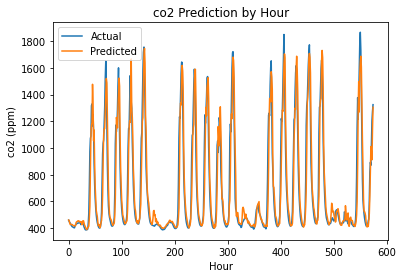

Epoch 1/20
2373/2373 - 9s - loss: 0.0036 - 9s/epoch - 4ms/step
Epoch 2/20
2373/2373 - 7s - loss: 7.9637e-04 - 7s/epoch - 3ms/step
Epoch 3/20
2373/2373 - 5s - loss: 5.3928e-04 - 5s/epoch - 2ms/step
Epoch 4/20
2373/2373 - 7s - loss: 4.3391e-04 - 7s/epoch - 3ms/step
Epoch 5/20
2373/2373 - 6s - loss: 3.8980e-04 - 6s/epoch - 3ms/step
Epoch 6/20
2373/2373 - 6s - loss: 3.6619e-04 - 6s/epoch - 2ms/step
Epoch 7/20
2373/2373 - 7s - loss: 3.5265e-04 - 7s/epoch - 3ms/step
Epoch 8/20
2373/2373 - 6s - loss: 3.4190e-04 - 6s/epoch - 2ms/step
Epoch 9/20
2373/2373 - 7s - loss: 3.3196e-04 - 7s/epoch - 3ms/step
Epoch 10/20
2373/2373 - 5s - loss: 3.2324e-04 - 5s/epoch - 2ms/step
Epoch 11/20
2373/2373 - 6s - loss: 3.0172e-04 - 6s/epoch - 3ms/step
Epoch 12/20
2373/2373 - 5s - loss: 2.9508e-04 - 5s/epoch - 2ms/step
Epoch 13/20
2373/2373 - 6s - loss: 2.9050e-04 - 6s/epoch - 3ms/step
Epoch 14/20
2373/2373 - 5s - loss: 3.0046e-04 - 5s/epoch - 2ms/step
Epoch 15/20
2373/2373 - 6s - loss: 2.8692e-04 - 6s/epoch - 3m

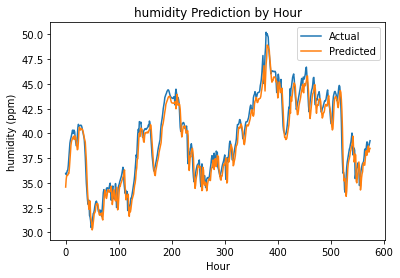

Epoch 1/20
2373/2373 - 9s - loss: 0.0066 - 9s/epoch - 4ms/step
Epoch 2/20
2373/2373 - 6s - loss: 0.0033 - 6s/epoch - 3ms/step
Epoch 3/20
2373/2373 - 5s - loss: 0.0029 - 5s/epoch - 2ms/step
Epoch 4/20
2373/2373 - 7s - loss: 0.0026 - 7s/epoch - 3ms/step
Epoch 5/20
2373/2373 - 5s - loss: 0.0025 - 5s/epoch - 2ms/step
Epoch 6/20
2373/2373 - 6s - loss: 0.0024 - 6s/epoch - 3ms/step
Epoch 7/20
2373/2373 - 5s - loss: 0.0023 - 5s/epoch - 2ms/step
Epoch 8/20
2373/2373 - 5s - loss: 0.0023 - 5s/epoch - 2ms/step
Epoch 9/20
2373/2373 - 5s - loss: 0.0022 - 5s/epoch - 2ms/step
Epoch 10/20
2373/2373 - 7s - loss: 0.0022 - 7s/epoch - 3ms/step
Epoch 11/20
2373/2373 - 6s - loss: 0.0021 - 6s/epoch - 2ms/step
Epoch 12/20
2373/2373 - 6s - loss: 0.0021 - 6s/epoch - 3ms/step
Epoch 13/20
2373/2373 - 5s - loss: 0.0021 - 5s/epoch - 2ms/step
Epoch 14/20
2373/2373 - 7s - loss: 0.0021 - 7s/epoch - 3ms/step
Epoch 15/20
2373/2373 - 5s - loss: 0.0021 - 5s/epoch - 2ms/step
Epoch 16/20
2373/2373 - 6s - loss: 0.0020 - 6s/ep

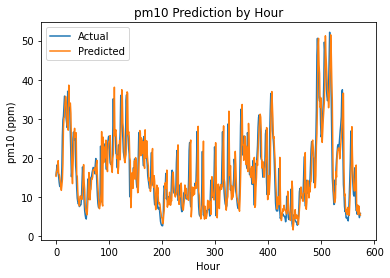

Epoch 1/20
2373/2373 - 9s - loss: 0.0093 - 9s/epoch - 4ms/step
Epoch 2/20
2373/2373 - 5s - loss: 0.0041 - 5s/epoch - 2ms/step
Epoch 3/20
2373/2373 - 6s - loss: 0.0035 - 6s/epoch - 3ms/step
Epoch 4/20
2373/2373 - 5s - loss: 0.0031 - 5s/epoch - 2ms/step
Epoch 5/20
2373/2373 - 6s - loss: 0.0029 - 6s/epoch - 2ms/step
Epoch 6/20
2373/2373 - 6s - loss: 0.0028 - 6s/epoch - 3ms/step
Epoch 7/20
2373/2373 - 6s - loss: 0.0027 - 6s/epoch - 3ms/step
Epoch 8/20
2373/2373 - 5s - loss: 0.0026 - 5s/epoch - 2ms/step
Epoch 9/20
2373/2373 - 6s - loss: 0.0025 - 6s/epoch - 3ms/step
Epoch 10/20
2373/2373 - 5s - loss: 0.0025 - 5s/epoch - 2ms/step
Epoch 11/20
2373/2373 - 6s - loss: 0.0024 - 6s/epoch - 3ms/step
Epoch 12/20
2373/2373 - 5s - loss: 0.0024 - 5s/epoch - 2ms/step
Epoch 13/20
2373/2373 - 6s - loss: 0.0023 - 6s/epoch - 3ms/step
Epoch 14/20
2373/2373 - 6s - loss: 0.0024 - 6s/epoch - 2ms/step
Epoch 15/20
2373/2373 - 7s - loss: 0.0023 - 7s/epoch - 3ms/step
Epoch 16/20
2373/2373 - 5s - loss: 0.0023 - 5s/ep

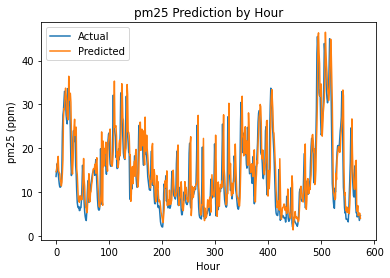

Epoch 1/20
2373/2373 - 9s - loss: 0.0177 - 9s/epoch - 4ms/step
Epoch 2/20
2373/2373 - 7s - loss: 0.0048 - 7s/epoch - 3ms/step
Epoch 3/20
2373/2373 - 5s - loss: 0.0037 - 5s/epoch - 2ms/step
Epoch 4/20
2373/2373 - 6s - loss: 0.0030 - 6s/epoch - 3ms/step
Epoch 5/20
2373/2373 - 5s - loss: 0.0028 - 5s/epoch - 2ms/step
Epoch 6/20
2373/2373 - 6s - loss: 0.0024 - 6s/epoch - 3ms/step
Epoch 7/20
2373/2373 - 5s - loss: 0.0023 - 5s/epoch - 2ms/step
Epoch 8/20
2373/2373 - 6s - loss: 0.0021 - 6s/epoch - 3ms/step
Epoch 9/20
2373/2373 - 5s - loss: 0.0021 - 5s/epoch - 2ms/step
Epoch 10/20
2373/2373 - 6s - loss: 0.0020 - 6s/epoch - 2ms/step
Epoch 11/20
2373/2373 - 5s - loss: 0.0019 - 5s/epoch - 2ms/step
Epoch 12/20
2373/2373 - 5s - loss: 0.0019 - 5s/epoch - 2ms/step
Epoch 13/20
2373/2373 - 5s - loss: 0.0017 - 5s/epoch - 2ms/step
Epoch 14/20
2373/2373 - 5s - loss: 0.0018 - 5s/epoch - 2ms/step
Epoch 15/20
2373/2373 - 5s - loss: 0.0017 - 5s/epoch - 2ms/step
Epoch 16/20
2373/2373 - 5s - loss: 0.0017 - 5s/ep

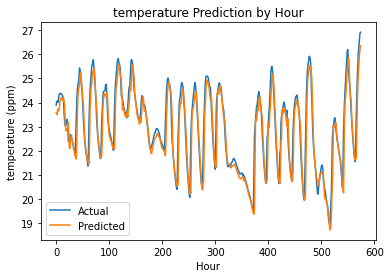

Epoch 1/20
2373/2373 - 8s - loss: 0.0096 - 8s/epoch - 3ms/step
Epoch 2/20
2373/2373 - 6s - loss: 0.0053 - 6s/epoch - 2ms/step
Epoch 3/20
2373/2373 - 5s - loss: 0.0046 - 5s/epoch - 2ms/step
Epoch 4/20
2373/2373 - 6s - loss: 0.0042 - 6s/epoch - 2ms/step
Epoch 5/20
2373/2373 - 5s - loss: 0.0040 - 5s/epoch - 2ms/step
Epoch 6/20
2373/2373 - 5s - loss: 0.0039 - 5s/epoch - 2ms/step
Epoch 7/20
2373/2373 - 6s - loss: 0.0039 - 6s/epoch - 2ms/step
Epoch 8/20
2373/2373 - 6s - loss: 0.0038 - 6s/epoch - 2ms/step
Epoch 9/20
2373/2373 - 6s - loss: 0.0037 - 6s/epoch - 3ms/step
Epoch 10/20
2373/2373 - 5s - loss: 0.0037 - 5s/epoch - 2ms/step
Epoch 11/20
2373/2373 - 6s - loss: 0.0037 - 6s/epoch - 3ms/step
Epoch 12/20
2373/2373 - 5s - loss: 0.0037 - 5s/epoch - 2ms/step
Epoch 13/20
2373/2373 - 6s - loss: 0.0036 - 6s/epoch - 3ms/step
Epoch 14/20
2373/2373 - 5s - loss: 0.0036 - 5s/epoch - 2ms/step
Epoch 15/20
2373/2373 - 6s - loss: 0.0036 - 6s/epoch - 3ms/step
Epoch 16/20
2373/2373 - 5s - loss: 0.0036 - 5s/ep

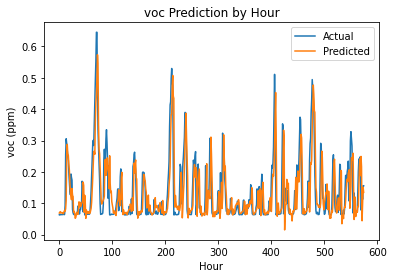

{'co2': 545.342020773192,
 'humidity': 5.800909913436075,
 'pm10': 13.1685024389488,
 'pm25': 12.254105609167658,
 'temperature': 2.25784760709436,
 'voc': 0.13293546322647923}

In [ ]:
from statsmodels.tsa.base import prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

pollutants=['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc'] ## All pollutants

# load data
df = pd.read_csv('gams.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)

def predictions(df, feature):
    # resample data by hour and calculate hourly mean
    df_hourly = df.resample('H').mean()
    df_hourly.dropna(inplace=True)

    # normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(df_hourly[[f'{feature}']])

    # split into training and testing sets
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    train, test = data[0:train_size,:], data[train_size:len(data),:]

    # function to create dataset with look_back number of previous time steps
    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            X.append(dataset[i:(i+look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    # reshape into X=t and Y=t+1
    look_back = 24
    train_X, train_Y = create_dataset(train, look_back)
    test_X, test_Y = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

    # build LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_Y, epochs=20, batch_size=1, verbose=2)

    # predict on test data
    test_predict = model.predict(test_X)

    # invert predictions and actual values to original scale
    test_predict = scaler.inverse_transform(test_predict)
    test_Y = scaler.inverse_transform([test_Y])

    # calculate root mean squared error
    test_score = np.sqrt(np.mean((test_predict - test_Y)**2))
    print('Test RMSE: %.2f' % (test_score))

    # create new time index for test data by hour
    start_time = df_hourly.index[train_size].replace(minute=0, second=0, microsecond=0)
    end_time = df_hourly.index[-1].replace(minute=0, second=0, microsecond=0)
    test_time_index = pd.date_range(start=start_time, end=end_time, freq='H')

    # plot actual vs predicted values
    plt.plot(range(len(test_Y[0])), df_hourly.tail(len(test_Y[0]))[f'{feature}'], label='Actual')
    plt.plot(range(len(test_Y[0])), test_predict[:,0], label='Predicted')
    plt.title(f'{feature} Prediction by Hour')
    plt.ylabel(f'{feature} (ppm)')
    plt.xlabel('Hour')
    plt.legend()
    plt.show()
    return test_score
score_dict = {val: predictions(df, val) for val in pollutants}
score_dict


## RANDOME FOREST AND XGBOOST

co2 Test RMSE for Random Forest: 549.64


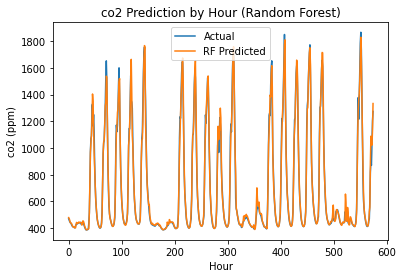

co2 Test RMSE for XGBoost: 551.98


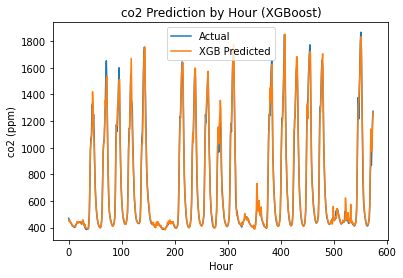

humidity Test RMSE for Random Forest: 5.89


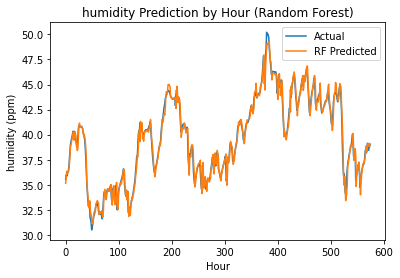

humidity Test RMSE for XGBoost: 5.88


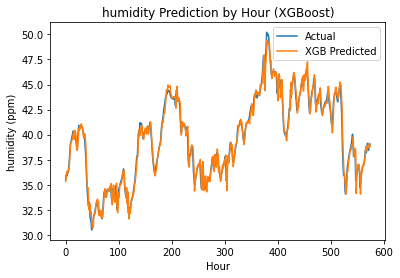

pm10 Test RMSE for Random Forest: 13.01


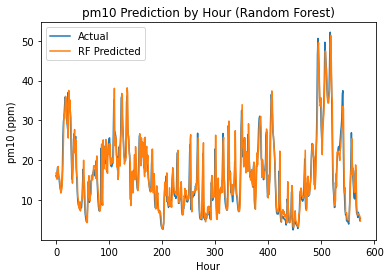

pm10 Test RMSE for XGBoost: 12.97


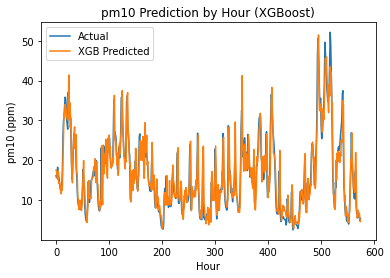

pm25 Test RMSE for Random Forest: 12.02


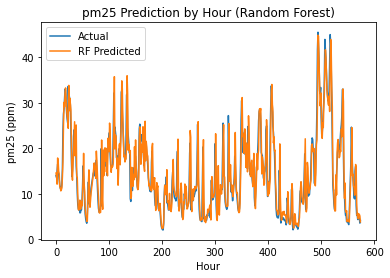

pm25 Test RMSE for XGBoost: 11.96


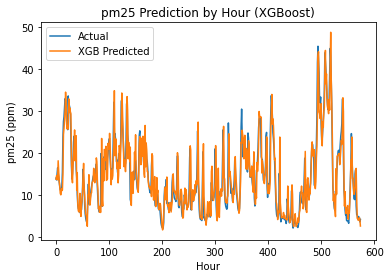

temperature Test RMSE for Random Forest: 2.26


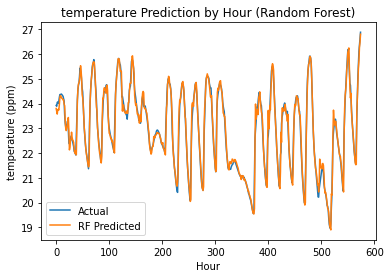

temperature Test RMSE for XGBoost: 2.27


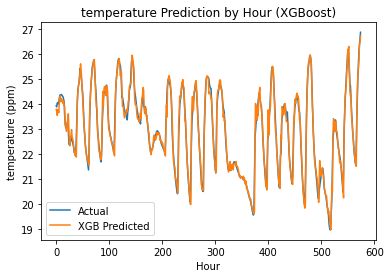

voc Test RMSE for Random Forest: 0.14


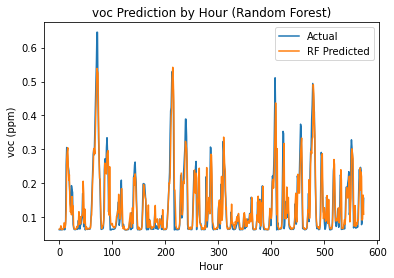

voc Test RMSE for XGBoost: 0.14


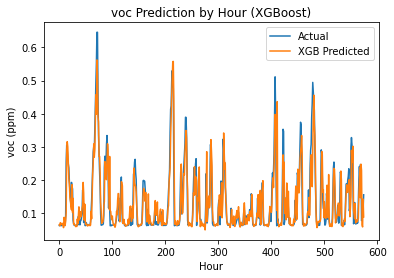

{'co2': 549.6438880558624, 'humidity': 5.885878475468185, 'pm10': 13.008481783289552, 'pm25': 12.02172842464011, 'temperature': 2.264834569566872, 'voc': 0.13561115237923674}
co2 Test RMSE for Random Forest: 549.55


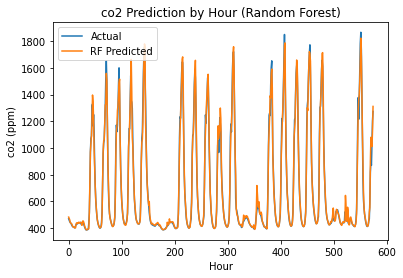

co2 Test RMSE for XGBoost: 551.98


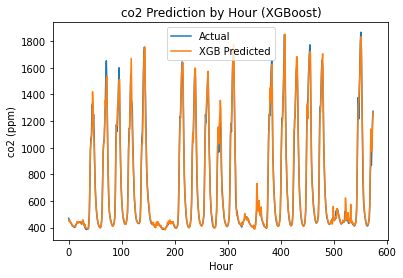

humidity Test RMSE for Random Forest: 5.89


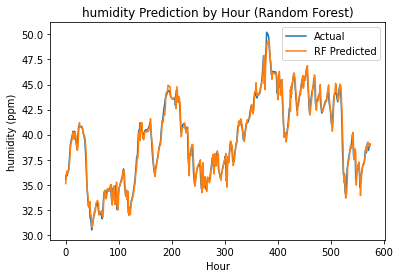

humidity Test RMSE for XGBoost: 5.88


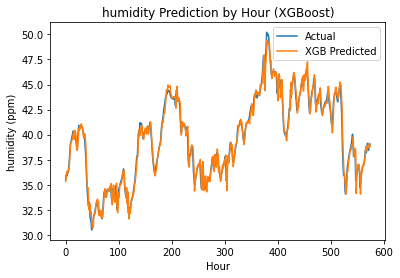

pm10 Test RMSE for Random Forest: 13.01


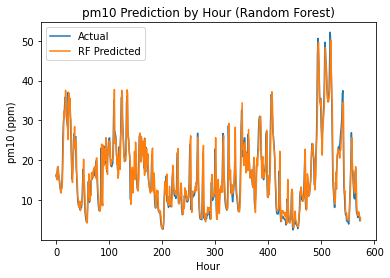

pm10 Test RMSE for XGBoost: 12.97


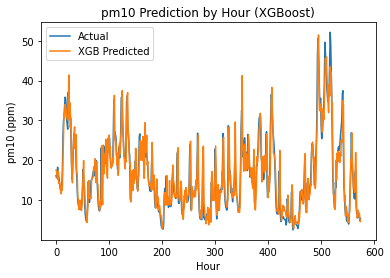

pm25 Test RMSE for Random Forest: 12.01


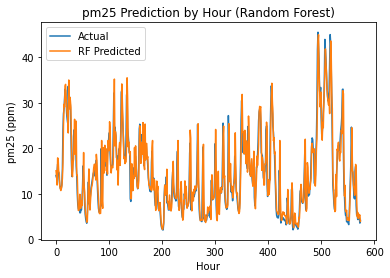

pm25 Test RMSE for XGBoost: 11.96


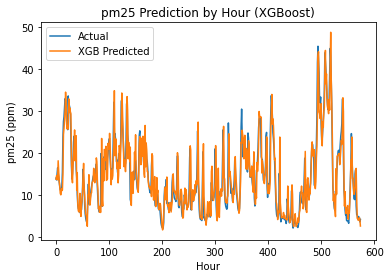

temperature Test RMSE for Random Forest: 2.27


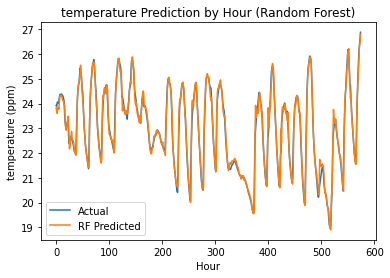

temperature Test RMSE for XGBoost: 2.27


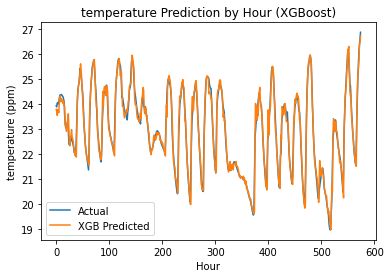

voc Test RMSE for Random Forest: 0.14


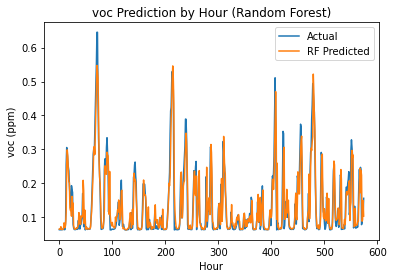

voc Test RMSE for XGBoost: 0.14


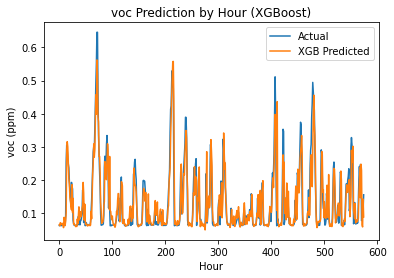

{'co2': 551.9751620201318, 'humidity': 5.882235195514628, 'pm10': 12.96828105461699, 'pm25': 11.9568132071307, 'temperature': 2.2739608156388997, 'voc': 0.13520395611754443}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def predictions(df, feature):
    # resample data by hour and calculate hourly mean
    df_hourly = df.resample('H').mean()
    df_hourly.dropna(inplace=True)

    # normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(df_hourly[[f'{feature}']])

    # split into training and testing sets
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    train, test = data[0:train_size,:], data[train_size:len(data),:]

    # function to create dataset with look_back number of previous time steps
    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            X.append(dataset[i:(i+look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    # reshape into X=t and Y=t+1
    look_back = 24
    train_X, train_Y = create_dataset(train, look_back)
    test_X, test_Y = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]))

    # build Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(train_X, train_Y)

    # predict on test data
    test_predict_rf = rf_model.predict(test_X)

    # invert predictions and actual values to original scale
    test_predict_rf = scaler.inverse_transform(test_predict_rf.reshape(-1,1))
    test_Y = scaler.inverse_transform([test_Y])

    # calculate root mean squared error for Random Forest
    test_score_rf = np.sqrt(np.mean((test_predict_rf - test_Y)**2))
    print(f'{feature} Test RMSE for Random Forest: {test_score_rf:.2f}')

    # plot actual vs predicted values for Random Forest
    plt.plot(test_Y[0], label='Actual')
    plt.plot(test_predict_rf[:,0], label='RF Predicted')
    plt.title(f'{feature} Prediction by Hour (Random Forest)')
    plt.ylabel(f'{feature} (ppm)')
    plt.xlabel('Hour')
    plt.legend()
    plt.show()

    # build XGBoost model
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    xgb_model.fit(train_X, train_Y)

    # predict on test data
    test_predict_xgb = xgb_model.predict(test_X)

    # invert predictions and actual values to original scale
    test_predict_xgb = scaler.inverse_transform(test_predict_xgb.reshape(-1,1))

    # calculate root mean squared error for XGBoost
    test_score_xgb = np.sqrt(np.mean((test_predict_xgb - test_Y)**2))
    print(f'{feature} Test RMSE for XGBoost: {test_score_xgb:.2f}')

    # plot actual vs predicted values for XGBoost
    plt.plot(test_Y[0], label='Actual')
    plt.plot(test_predict_xgb[:,0], label='XGB Predicted')
    plt.title(f'{feature} Prediction by Hour (XGBoost)')
    plt.ylabel(f'{feature} (ppm)')
    plt.xlabel('Hour')
    plt.legend()
    plt.show()
    return test_score_rf, test_score_xgb

score_dict_rf = {val: predictions(df, val)[0] for val in pollutants}
print(score_dict_rf)

score_dict_xgb = {val: predictions(df, val)[1] for val in pollutants}
print(score_dict_xgb)



co2 Test RMSE for Decision Tree: 550.28


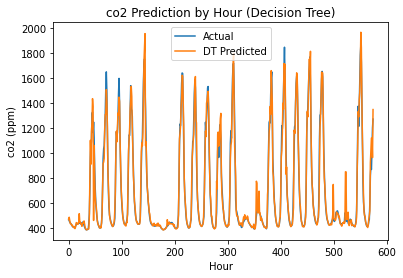

co2 Test RMSE for SVR: 506.52


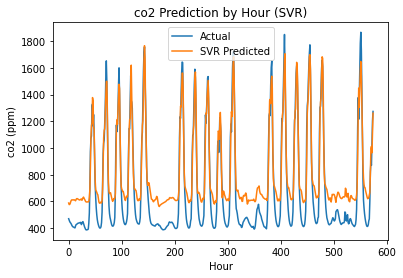

humidity Test RMSE for Decision Tree: 5.92


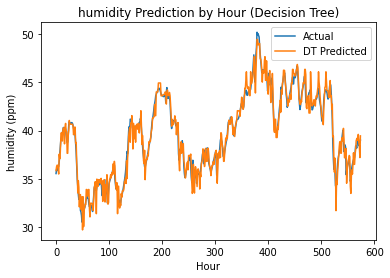

humidity Test RMSE for SVR: 5.63


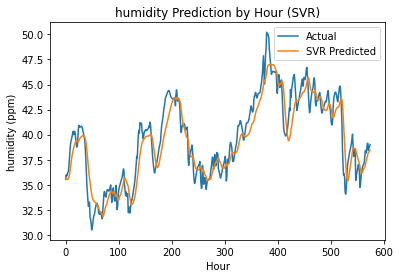

pm10 Test RMSE for Decision Tree: 13.35


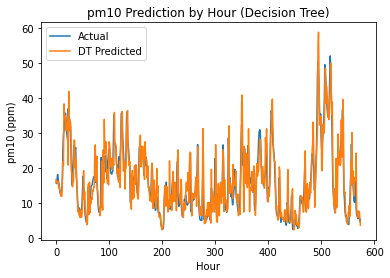

pm10 Test RMSE for SVR: 12.32


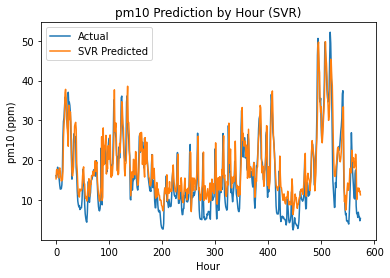

pm25 Test RMSE for Decision Tree: 12.37


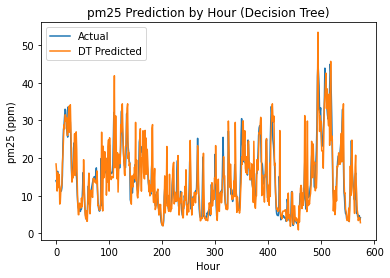

pm25 Test RMSE for SVR: 11.45


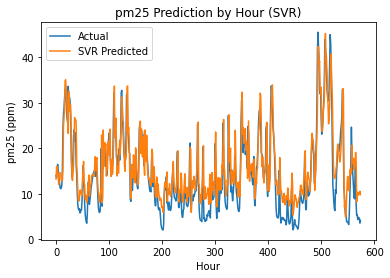

temperature Test RMSE for Decision Tree: 2.30


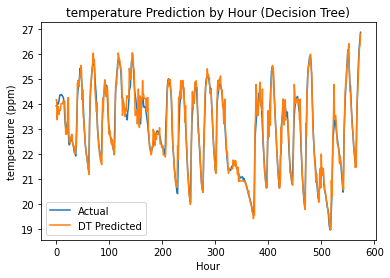

temperature Test RMSE for SVR: 2.18


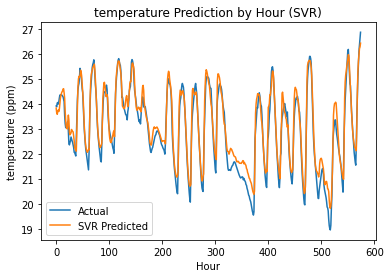

voc Test RMSE for Decision Tree: 0.14


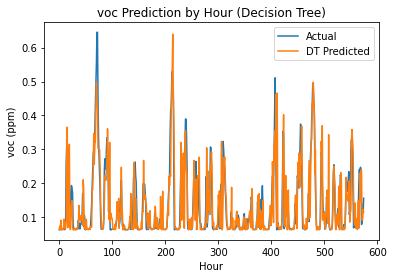

voc Test RMSE for SVR: 0.12


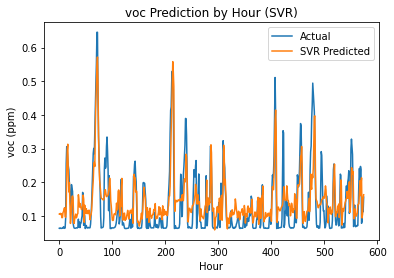

{'co2': 550.2817353820304, 'humidity': 5.9199534296205725, 'pm10': 13.347369277681963, 'pm25': 12.368874312426158, 'temperature': 2.3045660345583374, 'voc': 0.14014928736814808}
co2 Test RMSE for Decision Tree: 550.78


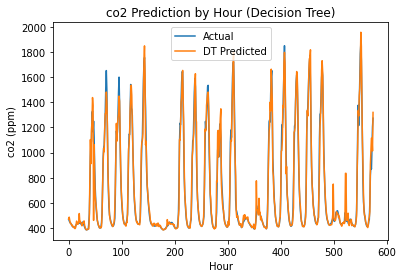

co2 Test RMSE for SVR: 506.52


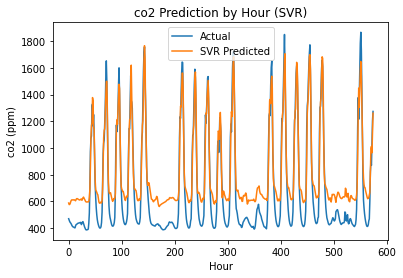

humidity Test RMSE for Decision Tree: 5.94


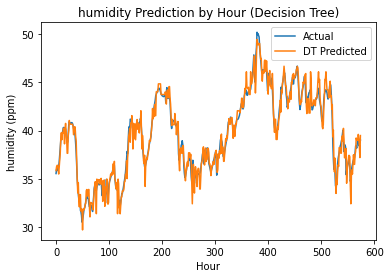

humidity Test RMSE for SVR: 5.63


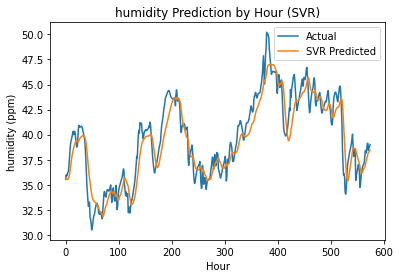

pm10 Test RMSE for Decision Tree: 13.35


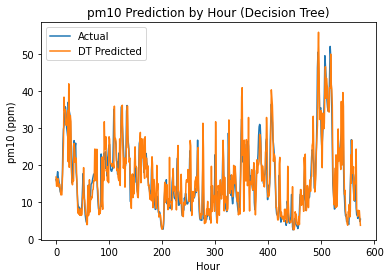

pm10 Test RMSE for SVR: 12.32


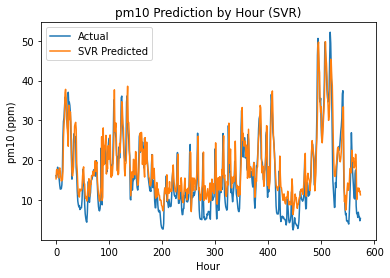

pm25 Test RMSE for Decision Tree: 12.26


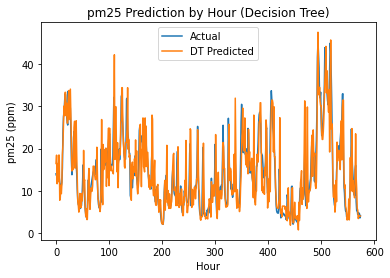

pm25 Test RMSE for SVR: 11.45


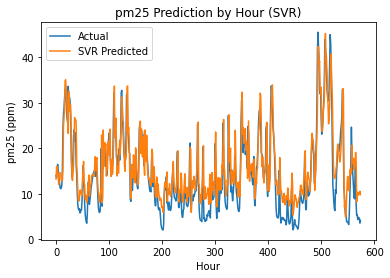

temperature Test RMSE for Decision Tree: 2.30


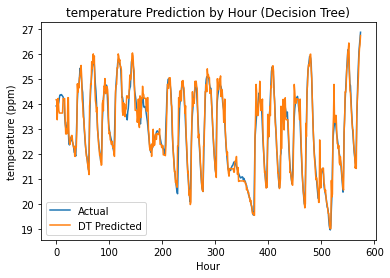

temperature Test RMSE for SVR: 2.18


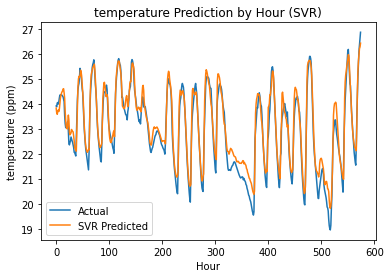

voc Test RMSE for Decision Tree: 0.14


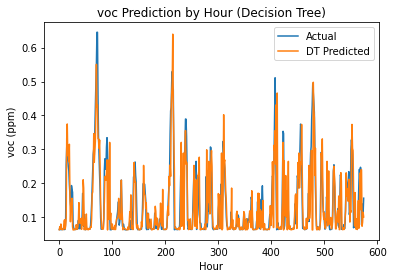

voc Test RMSE for SVR: 0.12


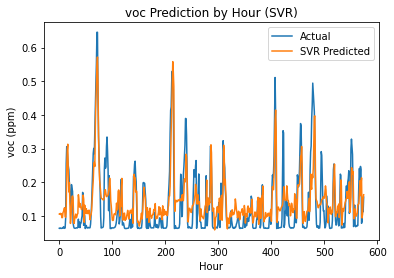

{'co2': 506.5238878106692, 'humidity': 5.628200835297274, 'pm10': 12.32441810197541, 'pm25': 11.446726695633584, 'temperature': 2.1797624377773195, 'voc': 0.12412086247374049}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

def predictions(df, feature):
    # resample data by hour and calculate hourly mean
    df_hourly = df.resample('H').mean()
    df_hourly.dropna(inplace=True)

    # normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(df_hourly[[f'{feature}']])

    # split into training and testing sets
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    train, test = data[0:train_size,:], data[train_size:len(data),:]

    # function to create dataset with look_back number of previous time steps
    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            X.append(dataset[i:(i+look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    # reshape into X=t and Y=t+1
    look_back = 24
    train_X, train_Y = create_dataset(train, look_back)
    test_X, test_Y = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]))

    # build Decision Tree model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(train_X, train_Y)

    # predict on test data
    test_predict_dt = dt_model.predict(test_X)

    # invert predictions and actual values to original scale
    test_predict_dt = scaler.inverse_transform(test_predict_dt.reshape(-1,1))
    test_Y = scaler.inverse_transform([test_Y])

    # calculate root mean squared error for Decision Tree
    test_score_dt = np.sqrt(np.mean((test_predict_dt - test_Y)**2))
    print(f'{feature} Test RMSE for Decision Tree: {test_score_dt:.2f}')

    # plot actual vs predicted values for Decision Tree
    plt.plot(test_Y[0], label='Actual')
    plt.plot(test_predict_dt[:,0], label='DT Predicted')
    plt.title(f'{feature} Prediction by Hour (Decision Tree)')
    plt.ylabel(f'{feature} (ppm)')
    plt.xlabel('Hour')
    plt.legend()
    plt.show()

    # build SVR model
    svr_model = SVR()
    svr_model.fit(train_X, train_Y)

    # predict on test data
    test_predict_svr = svr_model.predict(test_X)

    # invert predictions and actual values to original scale
    test_predict_svr = scaler.inverse_transform(test_predict_svr.reshape(-1,1))

    # calculate root mean squared error for SVR
    test_score_svr = np.sqrt(np.mean((test_predict_svr - test_Y)**2))
    print(f'{feature} Test RMSE for SVR: {test_score_svr:.2f}')

    # plot actual vs predicted values for SVR
    plt.plot(test_Y[0], label='Actual')
    plt.plot(test_predict_svr[:,0], label='SVR Predicted')
    plt.title(f'{feature} Prediction by Hour (SVR)')
    plt.ylabel(f'{feature} (ppm)')
    plt.xlabel('Hour')
    plt.legend()
    plt.show()
    return test_score_dt, test_score_svr

score_dict_dt = {val: predictions(df, val)[0] for val in pollutants}
print(score_dict_dt)

score_dict_svr = {val: predictions(df, val)[1] for val in pollutants}
print(score_dict_svr)


# KNN AND GBR

co2 Test RMSE for KNN: 540.89


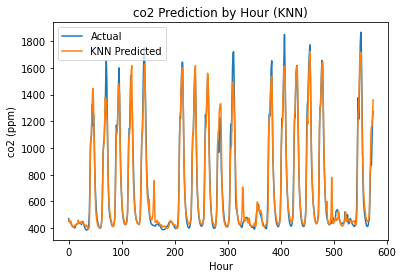

co2 Test RMSE for Gradient Boosting: 546.24


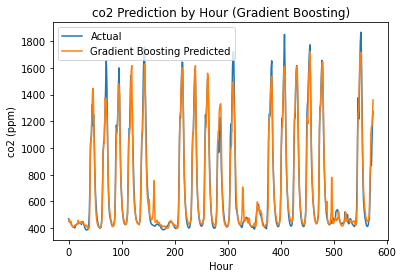

humidity Test RMSE for KNN: 5.85


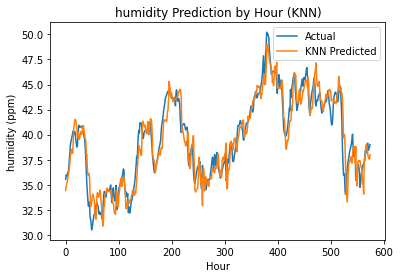

humidity Test RMSE for Gradient Boosting: 5.87


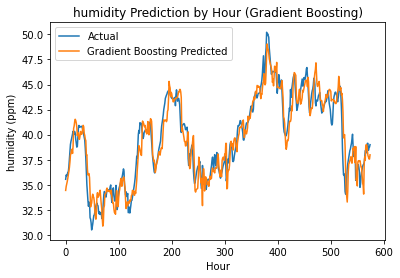

pm10 Test RMSE for KNN: 12.50


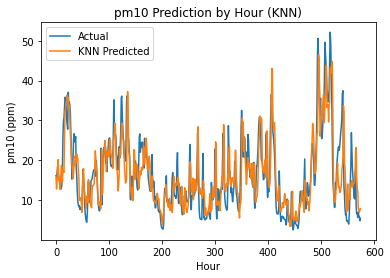

pm10 Test RMSE for Gradient Boosting: 12.99


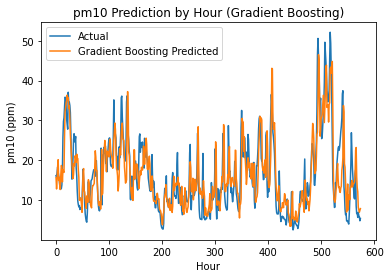

pm25 Test RMSE for KNN: 11.52


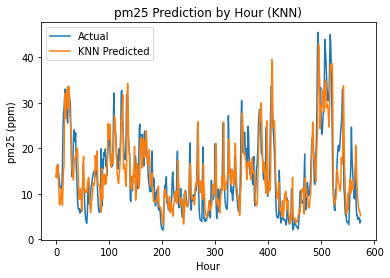

pm25 Test RMSE for Gradient Boosting: 11.96


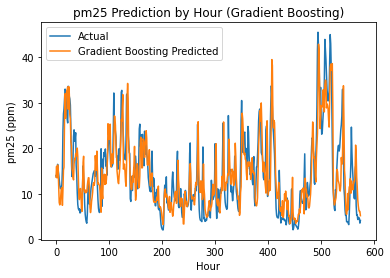

temperature Test RMSE for KNN: 2.26


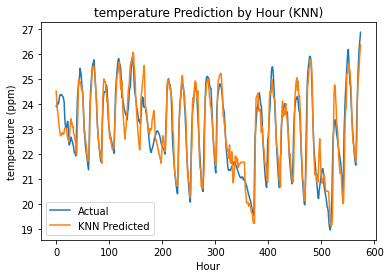

temperature Test RMSE for Gradient Boosting: 2.26


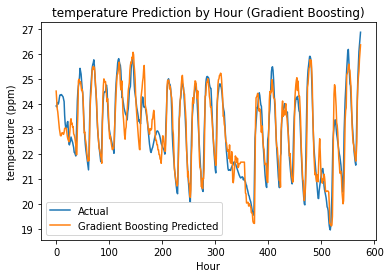

voc Test RMSE for KNN: 0.13


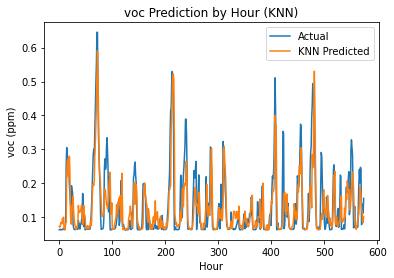

voc Test RMSE for Gradient Boosting: 0.14


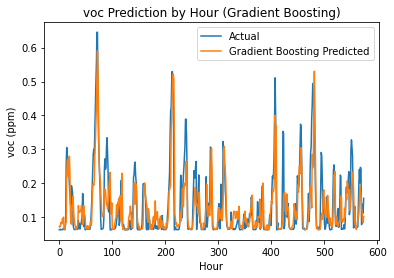

{'co2': 540.8872965476014, 'humidity': 5.849734009711964, 'pm10': 12.502129759168529, 'pm25': 11.521771946114608, 'temperature': 2.2626215617602803, 'voc': 0.12929967140984233}
co2 Test RMSE for KNN: 540.89


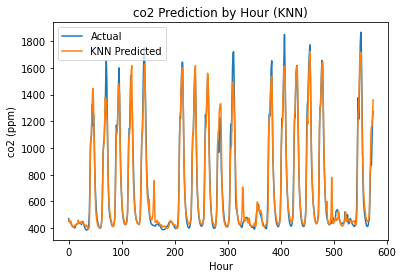

co2 Test RMSE for Gradient Boosting: 546.31


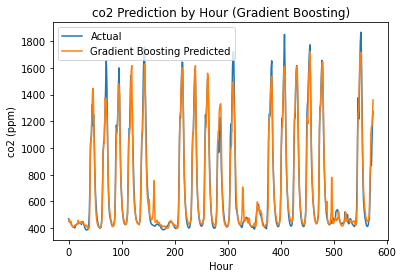

humidity Test RMSE for KNN: 5.85


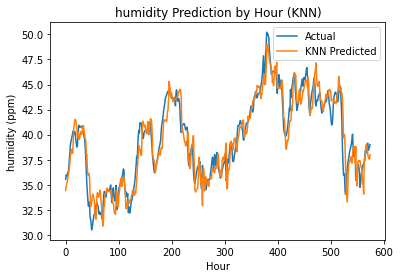

humidity Test RMSE for Gradient Boosting: 5.87


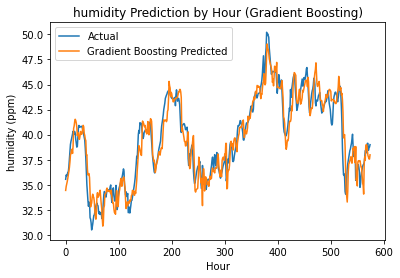

pm10 Test RMSE for KNN: 12.50


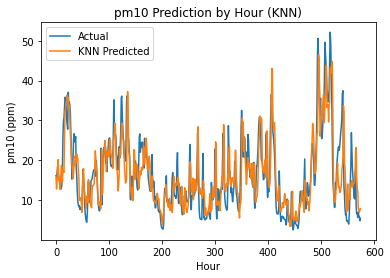

pm10 Test RMSE for Gradient Boosting: 12.99


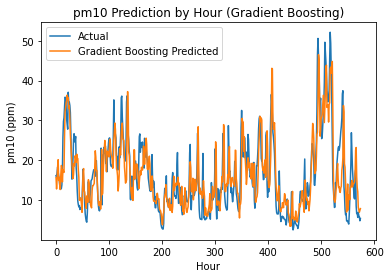

pm25 Test RMSE for KNN: 11.52


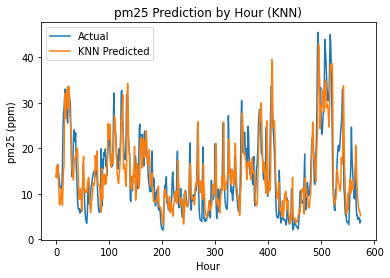

pm25 Test RMSE for Gradient Boosting: 11.96


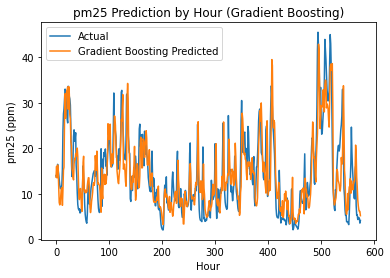

temperature Test RMSE for KNN: 2.26


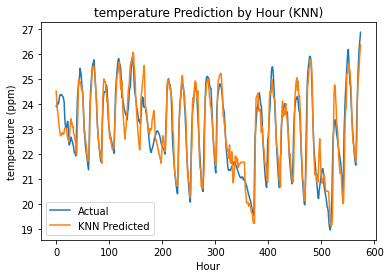

temperature Test RMSE for Gradient Boosting: 2.26


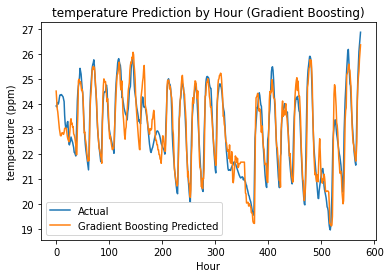

voc Test RMSE for KNN: 0.13


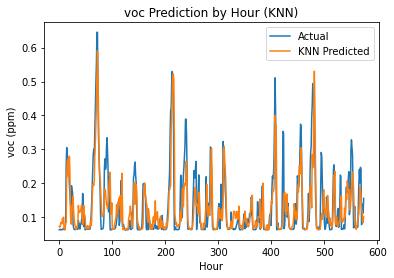

voc Test RMSE for Gradient Boosting: 0.14


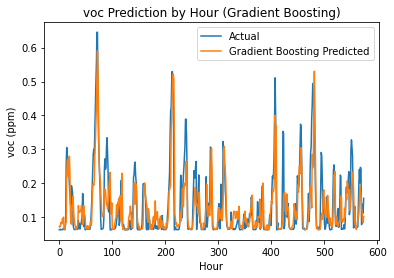

{'co2': 546.307367374163, 'humidity': 5.873548916915521, 'pm10': 12.985210119038607, 'pm25': 11.961698241450643, 'temperature': 2.2626007587361014, 'voc': 0.1354291018819367}


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# def predictions(df, feature):
#     # resample data by hour and calculate hourly mean
#     df_hourly = df.resample('H').mean()
#     df_hourly.dropna(inplace=True)

#     # normalize data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data = scaler.fit_transform(df_hourly[[f'{feature}']])

#     # split into training and testing sets
#     train_size = int(len(data) * 0.8)
#     test_size = len(data) - train_size
#     train, test = data[0:train_size,:], data[train_size:len(data),:]

#     # function to create dataset with look_back number of previous time steps
#     def create_dataset(dataset, look_back=1):
#         X, Y = [], []
#         for i in range(len(dataset)-look_back-1):
#             X.append(dataset[i:(i+look_back), 0])
#             Y.append(dataset[i + look_back, 0])
#         return np.array(X), np.array(Y)

#     # reshape into X=t and Y=t+1
#     look_back = 24
#     train_X, train_Y = create_dataset(train, look_back)
#     test_X, test_Y = create_dataset(test, look_back)

#     # reshape input to be [samples, time steps, features]
#     train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]))
#     test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]))

#     # build KNN model
#     knn_model = KNeighborsRegressor(n_neighbors=5)
#     knn_model.fit(train_X, train_Y)

#     # predict on test data
#     test_predict_knn = knn_model.predict(test_X)

#     # invert predictions and actual values to original scale
#     test_predict_knn = scaler.inverse_transform(test_predict_knn.reshape(-1,1))
#     test_Y = scaler.inverse_transform([test_Y])

#     # calculate root mean squared error for KNN
#     test_score_knn = np.sqrt(np.mean((test_predict_knn - test_Y)**2))
#     print(f'{feature} Test RMSE for KNN: {test_score_knn:.2f}')

#     # plot actual vs predicted values for KNN
#     plt.plot(test_Y[0], label='Actual')
#     plt.plot(test_predict_knn[:,0], label='KNN Predicted')
#     plt.title(f'{feature} Prediction by Hour (KNN)')
#     plt.ylabel(f'{feature} (ppm)')
#     plt.xlabel('Hour')
#     plt.legend()
#     plt.show()

#     # build Gradient Boosting model
#     gb_model = GradientBoostingRegressor(n_estimators=100)
#     gb_model.fit(train_X, train_Y)

#     # predict on test data
#     test_predict_gb = gb_model.predict(test_X)

#     # invert predictions and actual values to original scale
#     test_predict_gb = scaler.inverse_transform(test_predict_gb.reshape(-1,1))

#     # calculate root mean squared error for Gradient Boosting
#     test_score_gb = np.sqrt(np.mean((test_predict_gb - test_Y)**2))
#     print(f'{feature} Test RMSE for Gradient Boosting: {test_score_gb:.2f}')

#     # plot actual vs predicted values for Gradient Boosting
#     plt.plot(test_Y[0], label='Actual')
#     plt.plot(test_predict_knn[:,0], label='Gradient Boosting Predicted')
#     plt.title(f'{feature} Prediction by Hour (Gradient Boosting)')
#     plt.ylabel(f'{feature} (ppm)')
#     plt.xlabel('Hour')
#     plt.legend()
#     plt.show()
#     return test_score_knn, test_score_gb

# score_dict_knn = {val: predictions(df, val)[0] for val in pollutants}
# print(score_dict_knn)

# score_dict_gb = {val: predictions(df, val)[1] for val in pollutants}
# print(score_dict_gb)


## LSTM Autoregressive and others

In [ ]:
df.columns

Index(['ts', 'co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc'], dtype='object')

In [ ]:
df.isnull().sum()

ts             0
co2            0
humidity       0
pm10           0
pm25           0
temperature    0
voc            0
dtype: int64

## OUtliers

<AxesSubplot:title={'center':'Oultlier in the data'}>

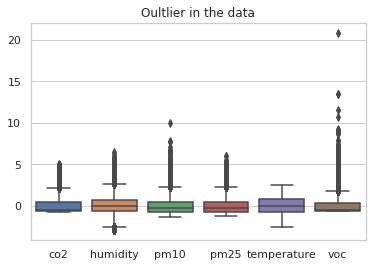

In [ ]:
import pandas as pd
import seaborn as sns

# Load the data
df = pd.read_csv('gams.csv')

# Normalize the data
cols_to_normalize = ['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc']
df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].mean()) / df[cols_to_normalize].std()

z_threshold = 3

# Calculate z-scores for each column except timestamp (ts)
z_scores = (df.drop('ts', axis=1) - df.drop('ts', axis=1).mean()) / df.drop('ts', axis=1).std()

# Find rows where any column has a z-score greater than the threshold
outlier_mask = (z_scores.abs() > z_threshold).any(axis=1)

# Store the cleaned data in a new dataframe
cleaned_df = df[~outlier_mask]
cleaned_df = df.reset_index(drop=True).copy()

plt.title("Oultlier in the data")
# Create boxplots with outliers highlighted
sns.set(style="whitegrid")
sns.boxplot(data=df[cols_to_normalize], palette="deep")



In [ ]:
cleaned_df.head()

ts       co2  humidity      pm10      pm25  temperature  \
0  2016-11-21 00:47:03  0.049675  6.474092 -0.583440 -0.580867    -1.028544   
1  2016-11-21 00:48:03  0.013391  6.258356 -0.527901 -0.486926    -0.940785   
2  2016-11-21 00:49:03  0.010800  5.912041 -0.583440 -0.504007    -0.848150   
3  2016-11-21 00:50:03  0.008208  5.857161 -0.631045 -0.529627    -0.765266   
4  2016-11-21 00:51:03  0.003024  5.813635 -0.646914 -0.632108    -0.706760   

        voc  
0 -0.656492  
1 -0.656492  
2 -0.656492  
3 -0.656492  
4 -0.656492

## XGB and using other features to predict target feature

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Define the columns to use for prediction
predictors = ['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc']

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Column', 'MSE', 'Feature Importance'])

# Loop through the columns and run the XGBoost model
for column in predictors:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['ts', column], axis=1), df[column], test_size=0.2, random_state=42)

    # Define the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict the target variable for the testing set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model performance using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Mean squared error: ", mse)
    
    # Get the feature importance scores for the other columns
    feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    
    # Add the results to the dataframe
    results_df = results_df.append({'Column': column, 'MSE': mse, 'Feature Importance': feature_importance}, ignore_index=True)

# Print the final results dataframe



co2 Mean squared error:  31280.305295974595
humidity Mean squared error:  19.939460516538148
pm10 Mean squared error:  1.180174835244722
pm25 Mean squared error:  0.9654199516217843
temperature Mean squared error:  0.9808893297093422
voc Mean squared error:  0.004678139132764736


In [ ]:
results_df

Column           MSE  \
0          co2  31280.305296   
1     humidity     19.939461   
2         pm10      1.180175   
3         pm25      0.965420   
4  temperature      0.980889   
5          voc      0.004678   

                                  Feature Importance  
0  temperature    0.702635
voc            0.15515...  
1  temperature    0.242311
co2            0.24091...  
2  pm25           0.987781
voc            0.00432...  
3  pm10           0.987280
voc            0.00405...  
4  co2         0.798889
humidity    0.064254
voc ...  
5  co2            0.516996
humidity       0.16426...

## Random Forest and GBR

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Define the columns to use for prediction
predictors = ['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc']

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Algorithm', 'Column', 'MSE', 'Feature Importance'])

# Loop through the algorithms and columns and run the models
for algorithm in ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']:
    for column in predictors:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(df.drop(['ts', column], axis=1), df[column], test_size=0.2, random_state=42)

        if algorithm == 'Random Forest':
            # Define the random forest model
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)

            # Train the model
            rf_model.fit(X_train, y_train)

            # Predict the target variable for the testing set
            y_pred = rf_model.predict(X_test)

        elif algorithm == 'Gradient Boosting':
            # Define the gradient boosting model
            gb_model = GradientBoostingRegressor(n_estimators=100)

            # Train the model
            gb_model.fit(X_train, y_train)

            # Predict the target variable for the testing set
            y_pred = gb_model.predict(X_test)

       

        # Evaluate the model performance using mean squared error
        mse = mean_squared_error(y_test, y_pred)
        print(f"{algorithm} {column} Mean squared error: ", mse)

        if algorithm == 'Random Forest':
            # Get the feature importance scores for the other columns
            feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

        elif algorithm == 'Gradient Boosting':
            # Get the feature importance scores for the other columns
            feature_importance = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

        # Add the results to the dataframe
        results_df = results_df.append({'Algorithm': algorithm, 'Column': column, 'MSE': mse, 'Feature Importance': feature_importance}, ignore_index=True)

# Print the final results dataframe
print(results_df)


In [ ]:
results_df

Algorithm       Column            MSE  \
0               Random Forest          co2   36801.696882   
1               Random Forest     humidity      22.773980   
2               Random Forest         pm10       1.654627   
3               Random Forest         pm25       1.366827   
4               Random Forest  temperature       1.164396   
5               Random Forest          voc       0.005057   
6           Gradient Boosting          co2   31242.854464   
7           Gradient Boosting     humidity      19.951263   
8           Gradient Boosting         pm10       1.180419   
9           Gradient Boosting         pm25       0.941291   
10          Gradient Boosting  temperature       0.982572   
11          Gradient Boosting          voc       0.004640   
12  Support Vector Regression          co2  621519.835767   
13  Support Vector Regression     humidity    1453.254579   
14  Support Vector Regression         pm10     463.751498   
15  Support Vector Regression         pm25     384.975191   
16  Support Vector Regression  temperature     524.741694   
17  Support Vector Regression          voc       0.004640   

                                   Feature Importance  
0   temperature    0.831337
humidity       0.08603...  
1   co2            0.411222
temperature    0.24408...  
2   pm25           0.999625
voc            0.00028...  
3   pm10           0.999884
humidity       0.00010...  
4   co2         0.888068
humidity    0.072424
voc ...  
5   co2            0.647625
humidity       0.21388...  
6   temperature    0.797820
humidity       0.09774...  
7   temperature    0.339353
co2            0.29323...  
8   pm25           0.997306
humidity       0.00103...  
9   pm10           0.997621
humidity       0.00076...  
10  co2         0.848010
humidity    0.099280
voc ...  
11  co2            0.598896
humidity       0.20002...  
12  co2            0.598896
humidity       0.20002...  
13  co2            0.598896
humidity       0.20002...  
14  co2            0.598896
humidity       0.20002...  
15  co2            0.598896
humidity       0.20002...  
16  co2            0.598896
humidity       0.20002...  
17  co2            0.598896
humidity       0.20002...

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('your_dataset.csv', parse_dates=['ts'], index_col='ts')
# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# Split into train and test sets
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]


In [ ]:

from pmdarima.arima import auto_arima

# Determine optimal parameters
model = auto_arima(train[['co2', 'pm10']], start_p=0, start_q=0, max_p=3, max_q=3, m=1,
                   seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
# Fit ARIMA model
model.fit(train[['co2', 'pm10']])
# Make predictions
predictions = model.predict(n_periods=len(test))
predictions_df = pd.DataFrame(predictions, index=test.index, columns=['co2_pred', 'pm10_pred'])
from sklearn.metrics import mean_squared_error

# Inverse scale the data
test_actual = scaler.inverse_transform(test)
predictions_actual = scaler.inverse_transform(predictions_df)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_actual['co2'], label='Actual')
plt.plot(predictions_actual['co2_pred'], label='Predicted')
plt.legend(loc='best')
plt.title('CO2 Prediction')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_actual['pm10'], label='Actual')
plt.plot(predictions_actual['pm10_pred'], label='Predicted')
plt.legend(loc='best')
plt.title('PM10 Prediction')
plt.show()

# Calculate mean squared error
mse = mean_squared_error(test_actual, predictions_actual)
print(f"Mean squared error: {mse:.2f}")


In [ ]:
# !pip install fbprophet==0.7
# https://www.kaggle.com/code/mortanramsey/notebooka7292768aa/edit
#https://www.kaggle.com/code/mortanramsey/notebooka7292768aa